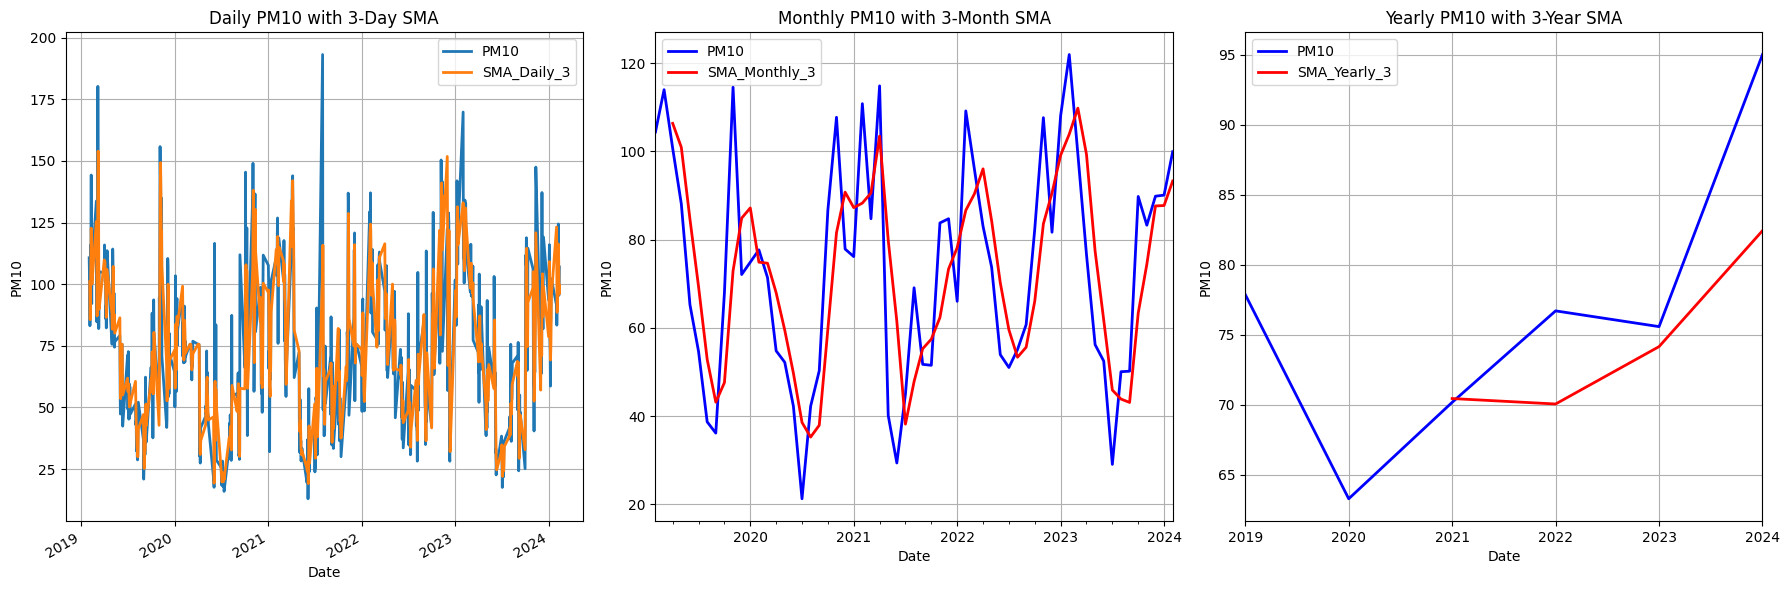

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

# Load the dataset from CSV
file_path = "/content/Bangalore_Bapuji.csv"  # Replace with the path to your dataset
df = pd.read_csv(file_path)

# Convert 'Time Stamp' column to datetime and set as index
df['Time Stamp'] = pd.to_datetime(df['Time Stamp'], format='%d/%m/%Y %H:%M', errors='coerce')
df.set_index('Time Stamp', inplace=True)

# Daily SMA
df['SMA_Daily_3'] = df['PM10'].rolling(window=3).mean()

# Resample for Monthly and Yearly SMA calculations
df_monthly = df['PM10'].resample('M').mean().to_frame()
df_monthly['SMA_Monthly_3'] = df_monthly['PM10'].rolling(window=3).mean()

df_yearly = df['PM10'].resample('Y').mean().to_frame()
df_yearly['SMA_Yearly_3'] = df_yearly['PM10'].rolling(window=3).mean()

# Plotting
fig, ax = plt.subplots(1, 3, figsize=(18, 6), sharex=False)

# Daily SMA Plot
df[['PM10', 'SMA_Daily_3']].plot(ax=ax[0], linewidth=2)
ax[0].set_title('Daily PM10 with 3-Day SMA')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('PM10')
ax[0].grid(True)

# Monthly SMA Plot
df_monthly[['PM10', 'SMA_Monthly_3']].plot(ax=ax[1], linewidth=2, color=['blue', 'red'])
ax[1].set_title('Monthly PM10 with 3-Month SMA')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('PM10')
ax[1].grid(True)

# Yearly SMA Plot
df_yearly[['PM10', 'SMA_Yearly_3']].plot(ax=ax[2], linewidth=2, color=['blue', 'red'])
ax[2].set_title('Yearly PM10 with 3-Year SMA')
ax[2].set_xlabel('Date')
ax[2].set_ylabel('PM10')
ax[2].grid(True)

plt.tight_layout()
plt.show()


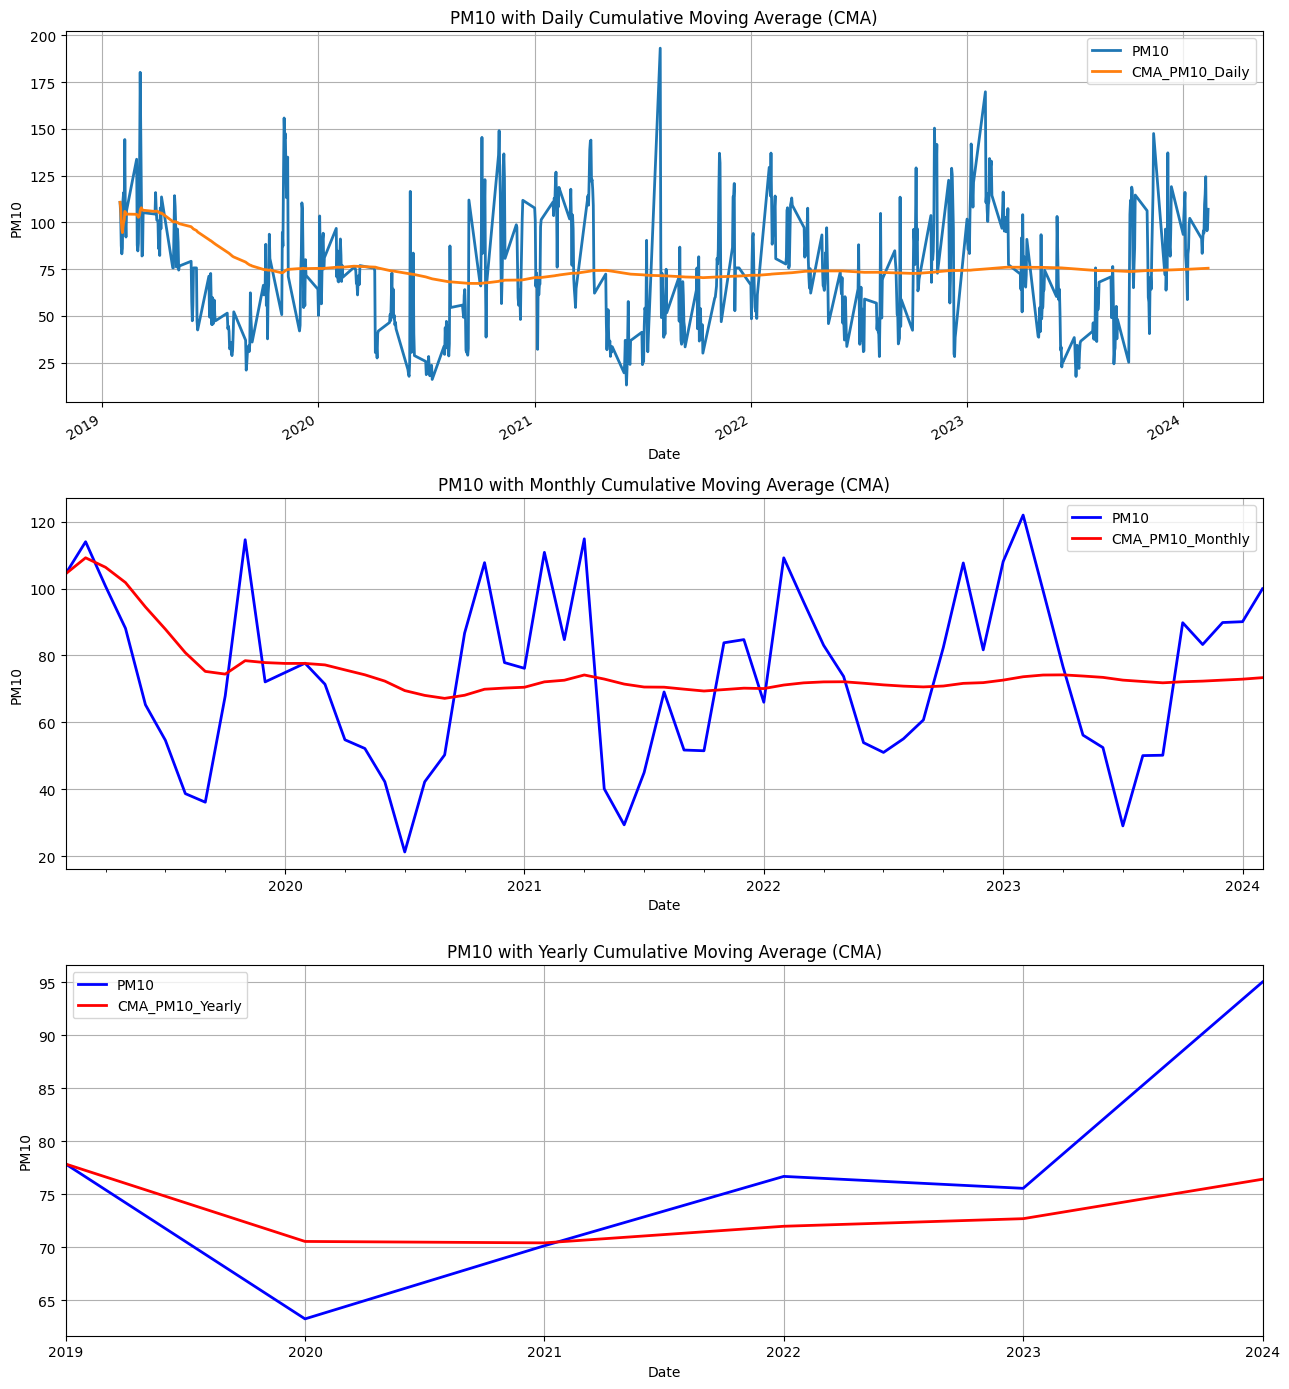

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

# Load the dataset from CSV
file_path = "/content/Bangalore_Bapuji.csv"  # Replace with the path to your dataset
df = pd.read_csv(file_path)

# Convert 'Time Stamp' column to datetime and set as index
df['Time Stamp'] = pd.to_datetime(df['Time Stamp'], format='%d/%m/%Y %H:%M', errors='coerce')
df.set_index('Time Stamp', inplace=True)

# Daily CMA for PM10
df['CMA_PM10_Daily'] = df['PM10'].expanding().mean()

# Monthly CMA for PM10
df_monthly = df['PM10'].resample('M').mean().to_frame()
df_monthly['CMA_PM10_Monthly'] = df_monthly['PM10'].expanding().mean()

# Yearly CMA for PM10
df_yearly = df['PM10'].resample('Y').mean().to_frame()
df_yearly['CMA_PM10_Yearly'] = df_yearly['PM10'].expanding().mean()

# Plotting
fig, ax = plt.subplots(3, 1, figsize=(13, 14), sharex=False)

# Daily CMA Plot
df[['PM10', 'CMA_PM10_Daily']].plot(ax=ax[0], linewidth=2)
ax[0].set_title('PM10 with Daily Cumulative Moving Average (CMA)')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('PM10')
ax[0].grid(True)

# Monthly CMA Plot
df_monthly[['PM10', 'CMA_PM10_Monthly']].plot(ax=ax[1], linewidth=2, color=['blue', 'red'])
ax[1].set_title('PM10 with Monthly Cumulative Moving Average (CMA)')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('PM10')
ax[1].grid(True)

# Yearly CMA Plot
df_yearly[['PM10', 'CMA_PM10_Yearly']].plot(ax=ax[2], linewidth=2, color=['blue', 'red'])
ax[2].set_title('PM10 with Yearly Cumulative Moving Average (CMA)')
ax[2].set_xlabel('Date')
ax[2].set_ylabel('PM10')
ax[2].grid(True)

plt.tight_layout()
plt.show()


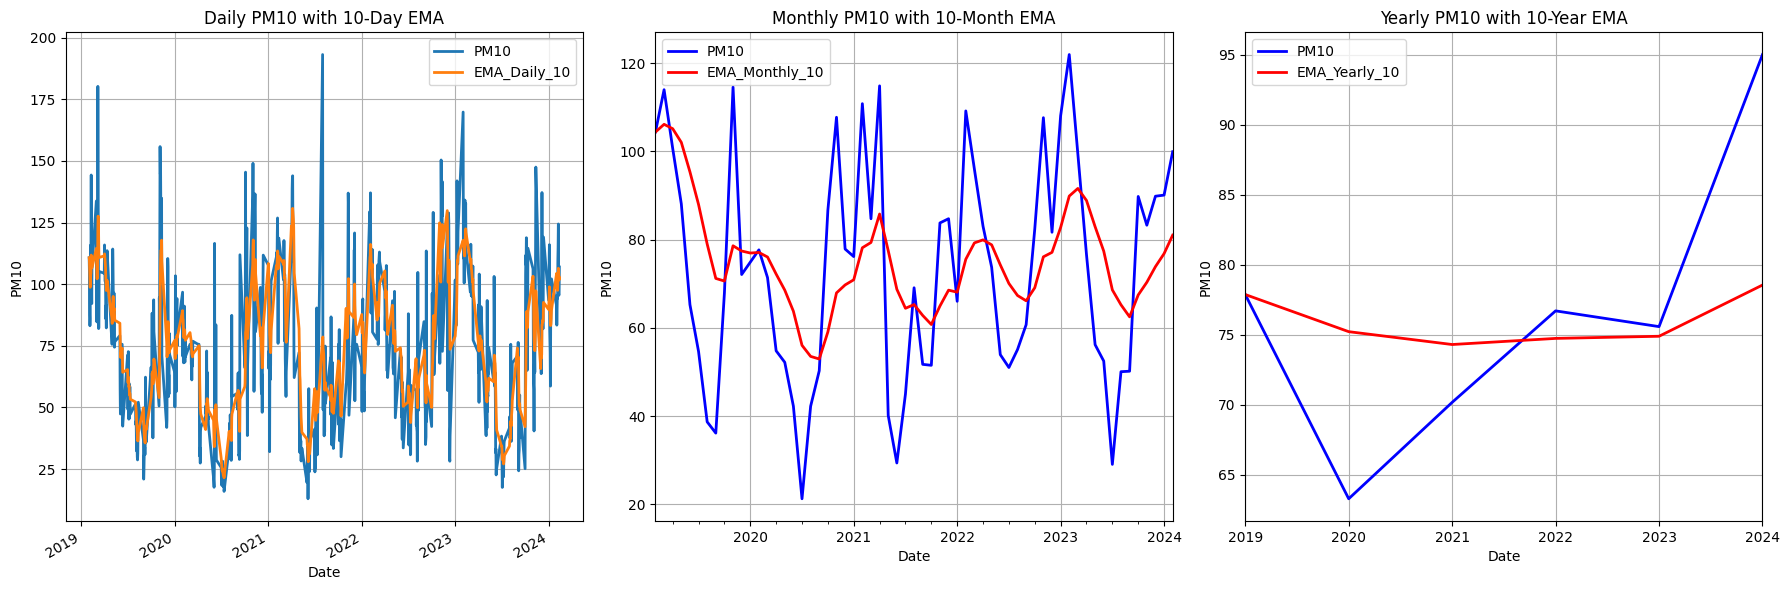

In [3]:
import pandas as pd
from matplotlib import pyplot as plt

# Load the dataset
df = pd.read_csv('/content/Bangalore_Bapuji.csv')

# Convert 'Time Stamp' to datetime and set it as index
df['Time Stamp'] = pd.to_datetime(df['Time Stamp'], format='%d/%m/%Y %H:%M', errors='coerce')
df.set_index('Time Stamp', inplace=True)

# Daily EMA
df['EMA_Daily_10'] = df['PM10'].ewm(span=10, adjust=False).mean()

# Resample for Monthly and Yearly EMA calculations
df_monthly = df['PM10'].resample('M').mean().to_frame()
df_monthly['EMA_Monthly_10'] = df_monthly['PM10'].ewm(span=10, adjust=False).mean()

df_yearly = df['PM10'].resample('Y').mean().to_frame()
df_yearly['EMA_Yearly_10'] = df_yearly['PM10'].ewm(span=10, adjust=False).mean()

# Plotting
fig, ax = plt.subplots(1, 3, figsize=(18, 6), sharex=False)

# Daily EMA Plot
df[['PM10', 'EMA_Daily_10']].plot(ax=ax[0], linewidth=2)
ax[0].set_title('Daily PM10 with 10-Day EMA')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('PM10')
ax[0].grid(True)

# Monthly EMA Plot
df_monthly[['PM10', 'EMA_Monthly_10']].plot(ax=ax[1], linewidth=2, color=['blue', 'red'])
ax[1].set_title('Monthly PM10 with 10-Month EMA')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('PM10')
ax[1].grid(True)

# Yearly EMA Plot
df_yearly[['PM10', 'EMA_Yearly_10']].plot(ax=ax[2], linewidth=2, color=['blue', 'red'])
ax[2].set_title('Yearly PM10 with 10-Year EMA')
ax[2].set_xlabel('Date')
ax[2].set_ylabel('PM10')
ax[2].grid(True)

plt.tight_layout()
plt.show()


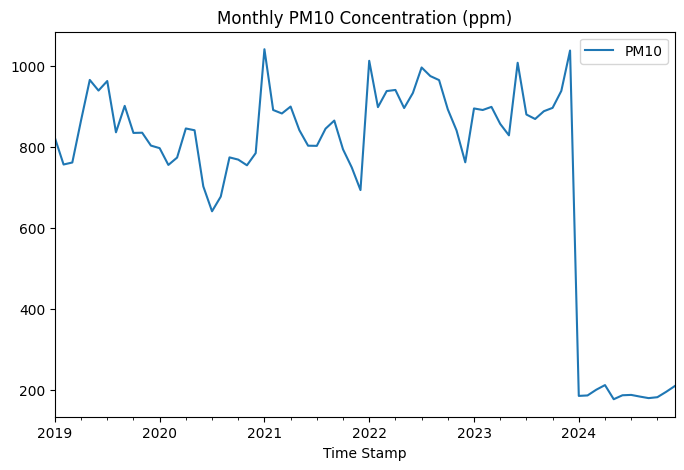

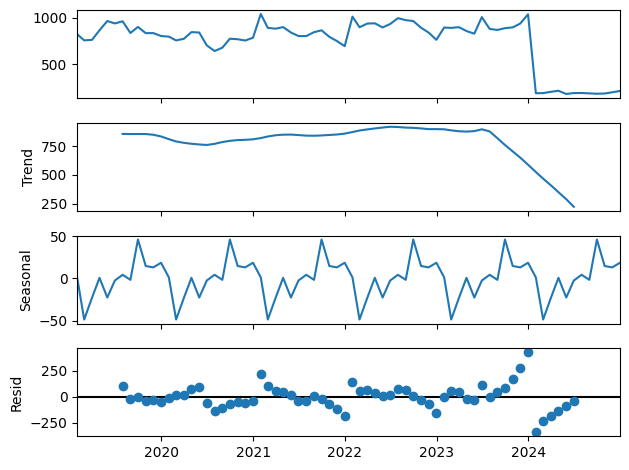

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load your dataset
file_path = "/content/Bangalore_Bapuji.csv"  # Replace with the path to your dataset
df = pd.read_csv(file_path)

# Converting Excel date format to datetime and setting as dataframe index
df['Time Stamp'] = pd.to_datetime(df['Time Stamp'], errors='coerce')
df.dropna(subset=['Time Stamp'], inplace=True)
df.set_index('Time Stamp', inplace=True)

# Assuming 'PM10' is the column for PM10 levels
df = df[['PM10']]
df = df.resample('M').sum()

# Plot monthly PM10 concentration
df.plot(figsize=(8, 5))
plt.title('Monthly PM10 Concentration (ppm)')
plt.show()

# Perform seasonal decomposition
result = seasonal_decompose(df)

# Plot seasonal decomposition
result.plot()
plt.show()



predicted=0.43, expected=0.35
predicted=0.37, expected=0.33
predicted=0.33, expected=0.25
predicted=0.27, expected=0.33
predicted=0.33, expected=0.34
predicted=0.35, expected=0.37
predicted=0.38, expected=0.31
Test RMSE: 13.878


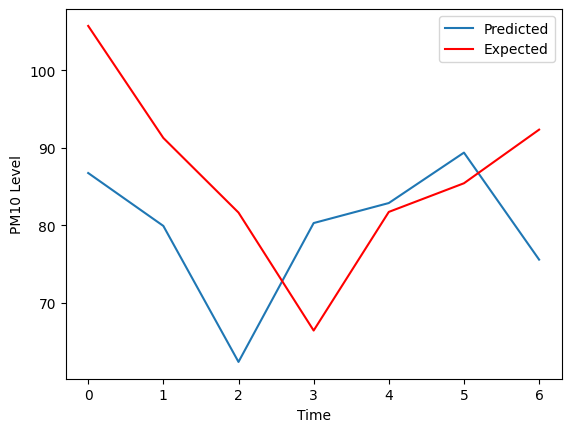

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
import numpy as np

# Load the dataset
file_path = "/content/Bangalore_Bapuji.csv"  # Replace with the path to your dataset
df = pd.read_csv(file_path)

# Assuming 'PM10' is the column for the time series data
ts_data = df['PM10'].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
ts_data_normalized = scaler.fit_transform(ts_data.reshape(-1, 1)).flatten()

# Split dataset for test and training
train, test = ts_data_normalized[1:len(ts_data_normalized)-7], ts_data_normalized[len(ts_data_normalized)-7:]

# Prepare lag features
def create_lag_features(data, lag):
    X, y = [], []
    for i in range(len(data)-lag):
        X.append(data[i:i+lag])
        y.append(data[i+lag])
    return X, y

lag = 20  # Adjust the lag value
X_train, y_train = create_lag_features(train, lag)

# Train Gradient Boosting Regressor
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Make predictions
predictions = []
history = train[-lag:].tolist()
for i in range(len(test)):
    prediction = model.predict([history])[0]
    predictions.append(prediction)
    history.append(test[i])
    history.pop(0)
    print('predicted=%.2f, expected=%.2f' % (prediction, test[i]))

# Convert to NumPy arrays
test = np.array(test)
predictions = np.array(predictions)

# Inverse transform to get original scale
test_original_scale = scaler.inverse_transform(test.reshape(-1, 1)).flatten()
predictions_original_scale = scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()

# Calculate RMSE
rmse = sqrt(mean_squared_error(test_original_scale, predictions_original_scale))
print('Test RMSE: %.3f' % rmse)

# Plot results
plt.plot(test_original_scale, label='Predicted')
plt.plot(predictions_original_scale, color='red', label='Expected')
plt.xlabel('Time')
plt.ylabel('PM10 Level')
plt.legend()
plt.show()









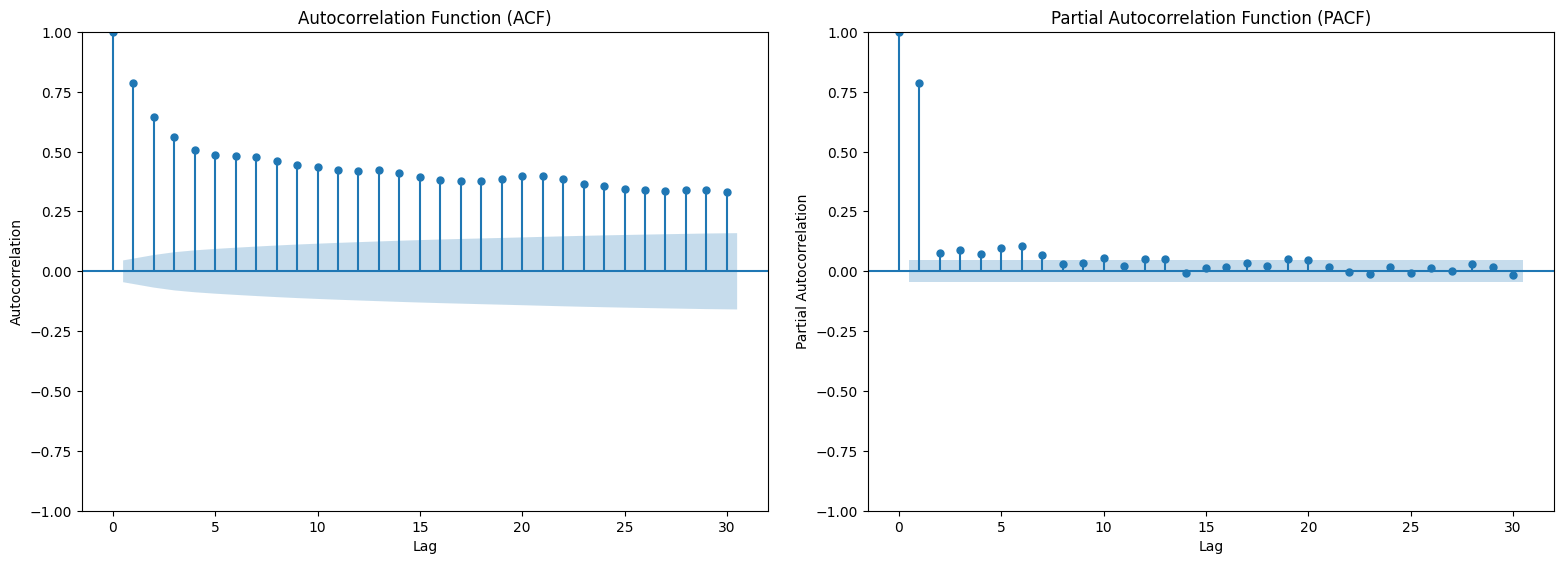

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the dataset
file_path = "/content/Bangalore_Bapuji.csv"  # Replace with the path to your dataset
df = pd.read_csv(file_path)

# Parse the 'Time Stamp' column to datetime with the correct format
df['Time Stamp'] = pd.to_datetime(df['Time Stamp'], format='%d-%m-%Y %H:%M', errors='coerce')

# Set the 'Time Stamp' column as the index
df.set_index('Time Stamp', inplace=True)

# Assuming 'PM10' is the column for the time series data
ts_data = df['PM10']

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot Autocorrelation Function (ACF)
plot_acf(ts_data, lags=30, ax=ax[0])
ax[0].set_title('Autocorrelation Function (ACF)')
ax[0].set_xlabel('Lag')
ax[0].set_ylabel('Autocorrelation')

# Plot Partial Autocorrelation Function (PACF)
plot_pacf(ts_data, lags=30, ax=ax[1])
ax[1].set_title('Partial Autocorrelation Function (PACF)')
ax[1].set_xlabel('Lag')
ax[1].set_ylabel('Partial Autocorrelation')

plt.tight_layout(pad=2.0)  # Adjust the padding between subplots
plt.show()

